In [1]:
#from google.colab import files
import json
from urllib.request import Request
from urllib.request import urlopen
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

from itertools import islice
import numpy as np
import pandas as pd

import scipy.stats as stats
import seaborn as sns

from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
request=Request('https://api.fda.gov/drug/event.json?count=occurcountry.exact')    
response = urlopen(request)   
elevations = response.read()   
data = json.loads(elevations) 

In [0]:
country_data = data['results']
country_code2counts = {item['term']: item['count']  for item in country_data}

In [0]:
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'HK', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'TW', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/St_Kitts'], 'code': 'PR', 'continent': 'North America', 'name': 'Puerto Rico', 'capital': 'Basseterre'},
]
code2country={item['code']: item['name'].upper() for item in countries}
country2code={value: key for key, value in code2country.items()}

In [0]:
'''
country2counts={}
for country_name, counts in country2counts.items():
    if len(country_name) == 2:
        try:
            country_name = code2country[country_name]
        except KeyError:
            print(country_name)
            pass
    if country_name in country2counts:
        country2counts[country_name] += counts
    else:
        country2counts[country_name] = counts
country2counts={key: value for key, value in sorted(country2counts.items(), key=lambda item: item[1], reverse=True)}
'''

In [5]:
country2counts={code2country[code]:counts  for code,counts in country_code2counts.items()}
country2counts_srt = {key: np.log(value) for key, value in sorted(country2counts.items(), key=lambda item: item[1], reverse=True)}
print(country2counts_srt)
#del country2counts_srt['UNITED STATES']

{'UNITED STATES': 15.544124313425872, 'UNITED KINGDOM': 12.512851213672944, 'JAPAN': 12.386271116838925, 'FRANCE': 12.321328044959452, 'CANADA': 12.308164324357548, 'GERMANY': 12.059982723658255, 'ITALY': 11.73573295982379, 'BRAZIL': 11.380958562178737, 'SPAIN': 11.054281074590582, 'AUSTRALIA': 11.006224655781187, 'KINGDOM OF THE NETHERLANDS': 10.892173361825634, 'COLOMBIA': 10.392435597782802, 'INDIA': 10.345573844099938, 'SWEDEN': 10.145766842158814, 'TURKEY': 10.076474005852402, 'ARGENTINA': 10.075800860133013, 'SWITZERLAND': 9.999978852724889, 'BELGIUM': 9.887002416276266, 'POLAND': 9.879911816007422, 'SOUTH KOREA': 9.839695419448349, 'PORTUGAL': 9.799403998992805, 'MEXICO': 9.75091895389152, 'GREECE': 9.67161854490356, 'ISRAEL': 9.580661777948766, 'DENMARK': 9.568084743872936, 'REPUBLIC OF IRELAND': 9.54873932271967, 'AUSTRIA': 9.547312483639047, 'SOUTH AFRICA': 9.49046898877305, 'RUSSIA': 9.460943436186543, 'VENEZUELA': 9.33485624667375, 'NORWAY': 9.176473302464606, 'CZECH REPUBL

In [7]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return dict(islice(iterable.items(), n))
num_elements = 20
country2counts_max20 = take(20, country2counts_srt)
print(country2counts_max20)

{'UNITED STATES': 15.544124313425872, 'UNITED KINGDOM': 12.512851213672944, 'JAPAN': 12.386271116838925, 'FRANCE': 12.321328044959452, 'CANADA': 12.308164324357548, 'GERMANY': 12.059982723658255, 'ITALY': 11.73573295982379, 'BRAZIL': 11.380958562178737, 'SPAIN': 11.054281074590582, 'AUSTRALIA': 11.006224655781187, 'KINGDOM OF THE NETHERLANDS': 10.892173361825634, 'COLOMBIA': 10.392435597782802, 'INDIA': 10.345573844099938, 'SWEDEN': 10.145766842158814, 'TURKEY': 10.076474005852402, 'ARGENTINA': 10.075800860133013, 'SWITZERLAND': 9.999978852724889, 'BELGIUM': 9.887002416276266, 'POLAND': 9.879911816007422, 'SOUTH KOREA': 9.839695419448349}


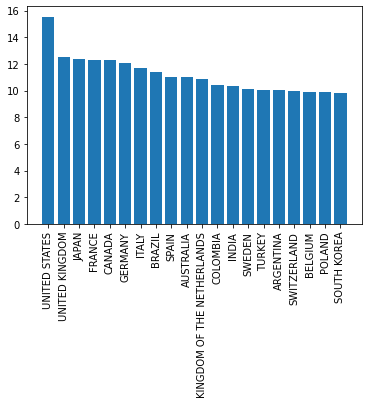

In [8]:
plt.bar(range(len(country2counts_max20)), list(country2counts_max20.values()), align='center')
plt.xticks(range(len(country2counts_max20)), list(country2counts_max20.keys()))
plt.xticks(rotation=90)
plt.show()

In [0]:
request=Request('https://api.fda.gov/drug/event.json?count=patient.reaction.reactionmeddrapt.exact')    
response = urlopen(request)   
elevations = response.read()   
data = json.loads(elevations)['results'] 

In [10]:
reaction2count = {item['term']: item['count'] for item in data}
reaction2count = {key: value for key,value in sorted(reaction2count.items(), key=lambda item: item[1], reverse=True)}
print(reaction2count)

{'DRUG INEFFECTIVE': 672852, 'NAUSEA': 458859, 'DEATH': 443514, 'FATIGUE': 412029, 'HEADACHE': 365182, 'DIARRHOEA': 335928, 'DYSPNOEA': 324374, 'PAIN': 305844, 'DIZZINESS': 297370, 'OFF LABEL USE': 291727, 'VOMITING': 273092, 'MALAISE': 272003, 'RASH': 221517, 'ASTHENIA': 220316, 'ARTHRALGIA': 209463, 'PYREXIA': 200321, 'FALL': 193541, 'PAIN IN EXTREMITY': 180091, 'PRURITUS': 177574, 'PNEUMONIA': 176405, 'ANXIETY': 169182, 'DRUG DOSE OMISSION': 166872, 'INSOMNIA': 166729, 'INJECTION SITE PAIN': 159901, 'WEIGHT DECREASED': 156119, 'DEPRESSION': 150634, 'FEELING ABNORMAL': 150193, 'COUGH': 142625, 'BACK PAIN': 137108, 'MYOCARDIAL INFARCTION': 136624, 'ABDOMINAL PAIN': 135440, 'CONDITION AGGRAVATED': 128106, 'WEIGHT INCREASED': 125999, 'BLOOD GLUCOSE INCREASED': 124861, 'DECREASED APPETITE': 122535, 'CHEST PAIN': 120553, 'HYPERTENSION': 120500, 'SOMNOLENCE': 118792, 'ANAEMIA': 116891, 'DRUG HYPERSENSITIVITY': 116270, 'HYPOTENSION': 116159, 'ABDOMINAL PAIN UPPER': 115793, 'CEREBROVASCULAR 

In [11]:
max_20_reactions = take(20, reaction2count)
print(max_20_reactions)

{'DRUG INEFFECTIVE': 672852, 'NAUSEA': 458859, 'DEATH': 443514, 'FATIGUE': 412029, 'HEADACHE': 365182, 'DIARRHOEA': 335928, 'DYSPNOEA': 324374, 'PAIN': 305844, 'DIZZINESS': 297370, 'OFF LABEL USE': 291727, 'VOMITING': 273092, 'MALAISE': 272003, 'RASH': 221517, 'ASTHENIA': 220316, 'ARTHRALGIA': 209463, 'PYREXIA': 200321, 'FALL': 193541, 'PAIN IN EXTREMITY': 180091, 'PRURITUS': 177574, 'PNEUMONIA': 176405}


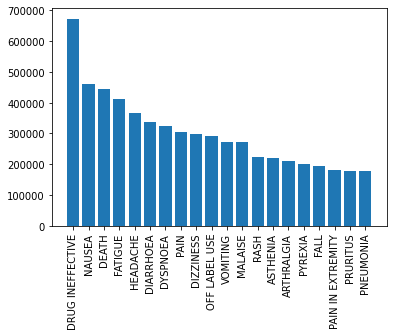

In [12]:
plt.bar(range(len(max_20_reactions)), list(max_20_reactions.values()), align='center')
plt.xticks(range(len(max_20_reactions)), list(max_20_reactions.keys()))
plt.xticks(rotation=90)
plt.show()

In [0]:
max_20_reactions

In [0]:
country2reactions=dict()
for country_code in country2code.values():
    try:
        search_link=('https://api.fda.gov/drug/event.json?search=occurcountry:"'+country_code+'"&count=patient.reaction.reactionmeddrapt.exact')
        response = urlopen(search_link)
        elevations = response.read()
        data=json.loads(elevations)['results'] 
        reactions2counts = {item['term']: item['count'] for item in data}
        country2reactions[code2country[country_code]] = {key: value for key,value in sorted(reactions2counts.items(), key=lambda item: item[1], reverse=True)}
    except:
        pass


In [14]:
print(country2reactions['JAPAN'])

{'PYREXIA': 9919, 'INTERSTITIAL LUNG DISEASE': 8012, 'PNEUMONIA': 7439, 'PLATELET COUNT DECREASED': 7130, 'ANAEMIA': 7112, 'DECREASED APPETITE': 6864, 'DIARRHOEA': 6572, 'MALIGNANT NEOPLASM PROGRESSION': 6242, 'HEPATIC FUNCTION ABNORMAL': 6184, 'RENAL IMPAIRMENT': 6147, 'OFF LABEL USE': 5830, 'DEATH': 5790, 'NAUSEA': 5640, 'MALAISE': 5256, 'CEREBRAL INFARCTION': 5144, 'RASH': 4778, 'WHITE BLOOD CELL COUNT DECREASED': 4585, 'DRUG INEFFECTIVE': 4413, 'CARDIAC FAILURE': 4124, 'FALL': 4079, 'VOMITING': 3841, 'NEUTROPHIL COUNT DECREASED': 3790, 'FEBRILE NEUTROPENIA': 3334, 'LIVER DISORDER': 3184, 'ALTERED STATE OF CONSCIOUSNESS': 3040, 'NEUTROPENIA': 2930, 'CONDITION AGGRAVATED': 2896, 'DYSPNOEA': 2812, 'SEPSIS': 2752, 'DIZZINESS': 2664, 'HAEMOGLOBIN DECREASED': 2620, 'HYPERTENSION': 2573, 'DISEASE PROGRESSION': 2545, 'OSTEONECROSIS OF JAW': 2482, 'LOSS OF CONSCIOUSNESS': 2463, 'ALANINE AMINOTRANSFERASE INCREASED': 2457, 'ASPARTATE AMINOTRANSFERASE INCREASED': 2412, 'PLASMA CELL MYELOMA': 2

In [0]:
country2reactions_df = pd.DataFrame.from_dict(country2reactions).T
country2reactions_df.replace(np.NaN,0, inplace=True)

In [16]:
country2reactions_df.head()

,DYSPNOEA,ERYTHEMA,DISCOMFORT,INFUSION RELATED REACTION,RASH,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ANION GAP ABNORMAL,APPLICATION SITE CELLULITIS,APPLICATION SITE PRURITUS,ARRHYTHMIA,ARTHROPATHY,ASCITES,ASTHENIA,BACK PAIN,BLOOD CREATININE ABNORMAL,BLOOD ELECTROLYTES ABNORMAL,BLOOD UREA ABNORMAL,BRONCHITIS,BRONCHOSPASM,BRUXISM,CHEST DISCOMFORT,CROHN^S DISEASE,DECREASED APPETITE,DERMATITIS BULLOUS,DRUG EFFECT INCOMPLETE,DRY SKIN,DYSGEUSIA,DYSGRAPHIA,DYSPHAGIA,DYSPHONIA,EPIGASTRIC DISCOMFORT,FALL,FEELING HOT,FINE MOTOR SKILL DYSFUNCTION,HAEMATOCRIT ABNORMAL,HEADACHE,HEPATIC CANCER,HEPATIC CIRRHOSIS,HEPATIC CYST,...,SUFFOCATION FEELING,TRANSPLANT REJECTION,ADRENAL GLAND INJURY,CORNEAL DEPOSITS,DERMATITIS PSORIASIFORM,METABOLIC ALKALOSIS,CATATONIA,APTYALISM,LOSS OF LIBIDO,METRORRHAGIA,TOOTH LOSS,OVERLAP SYNDROME,CHRONIC GRAFT VERSUS HOST DISEASE,MYOPATHY,PLASMACYTOMA,RETROPERITONEAL ABSCESS,SPLEEN TUBERCULOSIS,SPLENIC ABSCESS,TUBERCULOSIS OF CENTRAL NERVOUS SYSTEM,ELECTROCARDIOGRAM T WAVE INVERSION,HAEMOSIDEROSIS,RETROGRADE AMNESIA,STEROID DIABETES,AKINESIA,CHROMOSOMAL MUTATION,FREEZING PHENOMENON,GRAND MAL CONVULSION,OSTEOMYELITIS,PLEUROTHOTONUS,RETAINED PLACENTA OR MEMBRANES,SINUS ARREST,STAPHYLOCOCCAL SEPSIS,REBOUND EFFECT,RENAL TUBULAR ACIDOSIS,CHORIORETINOPATHY,INJECTION SITE PRURITUS,NASAL CONGESTION,INJECTION SITE SWELLING,INJECTION SITE RASH,NECK PAIN
ANDORRA,4.0,4.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFGHANISTAN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANTIGUA AND BARBUDA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALBANIA,10.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARMENIA,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
country2reactions_df.to_csv('country2reactions.csv')
pd.DataFrame.from_dict(max_20_reactions, orient='index').to_csv('max_20_reactions.csv')
pd.DataFrame.from_dict(country2counts_max20, orient='index').to_csv('country2counts_max20.csv')

In [0]:
files.download('max_20_reactions.csv')
files.download('country2counts_max20.csv')
files.download('country2reactions.csv')

In [0]:
request=Request('https://api.fda.gov/drug/event.json?count=patient.drug.openfda.generic_name.exact')    
response = urlopen(request)   
elevations = response.read()   
data = json.loads(elevations)['results'] 

In [19]:
drugname2counts = {x['term']: x['count'] for x in data}
len(drugname2counts)

100

In [20]:
max_20_drugname = take(20,drugname2counts)
print(max_20_drugname)

{'ADALIMUMAB': 430675, 'ASPIRIN': 333163, 'ASPIRIN 81 MG': 315916, 'ASPIRIN 325 MG': 315747, 'METHOTREXATE SODIUM': 268839, 'FUROSEMIDE': 245777, 'METHOTREXATE': 233817, 'PREDNISONE': 224117, 'GABAPENTIN': 206003, 'OMEPRAZOLE': 196213, 'LISINOPRIL': 195139, 'ERGOCALCIFEROL': 195081, 'METFORMIN': 181235, 'PREGABALIN': 172821, 'ACETAMINOPHEN': 167503, 'METOPROLOL TARTRATE': 164590, 'ESOMEPRAZOLE MAGNESIUM': 157377, 'ALBUTEROL SULFATE': 154824, 'NATALIZUMAB': 154565, 'DEXAMETHASONE': 152220}


In [0]:
drugindication2counts = {x['term']: x['count'] for x in data}
drugindication2counts = {key: value for key, value in sorted(drugindication2counts.items(), key=lambda item: item[1], reverse=True)}

In [0]:
#request=Request('https://api.fda.gov/drug/event.json?count=patient.drug.#.exact')    
#response = urlopen(request)   
#elevations = response.read()   
#data = json.loads(elevations)['results'] 

In [0]:
#medicinalproduct2counts = {x['term']: x['count'] for x in data}
#medicinalproduct2counts = {key: value for key, value in sorted(medicinalproduct2counts#.items(), key=lambda item: item[1], reverse=True)}

In [31]:
#max_20_medicinalproduct = take(20,medicinalproduct2counts)
#print(max_20_medicinalproduct)

{'ENBREL': 482453, 'HUMIRA': 425404, 'REVLIMID': 180079, 'ASPIRIN': 163668, 'METFORMIN': 161718, 'LYRICA': 154063, 'TYSABRI': 152158, 'ASPIRIN.': 151610, 'LIPITOR': 147676, 'NEXIUM': 147343, 'PREDNISONE.': 147205, 'METHOTREXATE': 140151, 'AMLODIPINE': 133207, 'XARELTO': 131403, 'AVONEX': 131236, 'OMEPRAZOLE.': 126322, 'SYNTHROID': 124890, 'VITAMIN D': 116455, 'LISINOPRIL.': 114912, 'GABAPENTIN.': 111261}


In [32]:
dico={}
for i in range(200):
    request=Request('https://api.fda.gov/drug/event.json?skip='+str(i)+'&limit=99')    
    response = urlopen(request)   
    elevations = response.read()   
    data = json.loads(elevations)    
    dico[str(i)] = json_normalize(data['results'])
df=pd.concat(dico,axis=0).droplevel(-2,axis=0).reset_index()
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,index,receiptdateformat,receiver,companynumb,receivedateformat,primarysource,seriousnessother,transmissiondateformat,fulfillexpeditecriteria,safetyreportid,receivedate,seriousnesshospitalization,transmissiondate,serious,receiptdate,sender.senderorganization,patient.patientonsetage,patient.reaction,patient.patientonsetageunit,patient.patientsex,patient.drug,seriousnessdeath,primarysource.qualification,primarysource.reportercountry,patient.patientdeath.patientdeathdate,patient.patientdeath.patientdeathdateformat,reporttype,safetyreportversion,duplicate,primarysourcecountry,seriousnessdisabling,receiver.receivertype,receiver.receiverorganization,sender.sendertype,reportduplicate.duplicatesource,reportduplicate.duplicatenumb,occurcountry,patient.patientagegroup,patient.summary.narrativeincludeclinical,seriousnesslifethreatening,patient.patientweight
0,0,102,NaN,HQWYE821915MAR04,102,NaN,1,102,1,4322505-4,20040319,1,20041129,1,20040315,FDA-Public Use,56,"[{'reactionmeddrapt': 'ARTHRALGIA'}, {'reactio...",801,1,"[{'drugstartdateformat': '102', 'drugindicatio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,102,NaN,JACAN16471,102,NaN,NaN,102,1,5801206-7,20080707,NaN,20090109,1,20080625,FDA-Public Use,26,[{'reactionmeddrapt': 'DRUG ADMINISTRATION ERR...,801,1,"[{'drugindication': 'DRUG ABUSE', 'drugadminis...",1,3,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,102,NaN,1289378,102,NaN,NaN,102,2,10003300,20140306,NaN,20141002,1,20140306,FDA-Public Use,77,"[{'reactionmeddraversionpt': '17.0', 'reaction...",801,2,"[{'drugstartdateformat': '102', 'drugindicatio...",NaN,5,US,NaN,NaN,1,1,1,US,1,6,FDA,2,GENENTECH,1289378,NaN,NaN,NaN,NaN,NaN
3,3,102,NaN,US-JNJFOC-20130719067,102,NaN,1,102,2,10003301,20140228,NaN,20141002,1,20140228,FDA-Public Use,NaN,"[{'reactionmeddraversionpt': '17.0', 'reaction...",NaN,2,[{'drugindication': 'PRODUCT USED FOR UNKNOWN ...,NaN,5,US,NaN,NaN,1,1,1,US,NaN,6,FDA,2,JANSSEN,US-JNJFOC-20130719067,NaN,NaN,NaN,NaN,NaN
4,4,102,NaN,US-PFIZER INC-2014068976,102,NaN,NaN,102,2,10003302,20140312,NaN,20141002,2,20140312,FDA-Public Use,NaN,"[{'reactionoutcome': '6', 'reactionmeddraversi...",NaN,1,"[{'drugcharacterization': '1', 'drugdosagetext...",NaN,5,US,NaN,NaN,1,1,1,US,NaN,6,FDA,2,PFIZER,US-PFIZER INC-2014068976,US,NaN,NaN,NaN,NaN


In [0]:
no_reactions=[len(x)  for x in df['patient.reaction']]
no_reactions2counts = dict(Counter(no_reactions))
no_reactions2counts={key: value for key, value in sorted(no_reactions2counts.items(), key=lambda item: item[1], reverse=True)}

In [0]:
no_drugs=[len(x) for x in df['patient.drug']]
no_drugs2counts = dict(Counter(no_drugs))
no_drugs2counts={key: value for key, value in sorted(no_drugs2counts.items(), key=lambda item: item[1], reverse=True)}

In [0]:
report_country = [x for x in df['primarysource.reportercountry']]

In [0]:
pd.DataFrame({'Country': report_country,'no_reactions': no_reactions}).to_csv('no_reactions2country.csv')
pd.DataFrame({'Country': report_country,'no_drugs': no_drugs}).to_csv('no_drugs2country.csv')

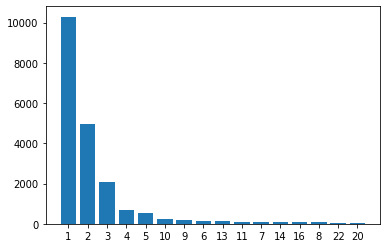

In [39]:
plt.bar(range(len(no_drugs2counts)), list(no_drugs2counts.values()), align='center')
plt.xticks(range(len(no_drugs2counts)), list(no_drugs2counts.keys()))
#plt.xticks(rotation=90)
plt.show()

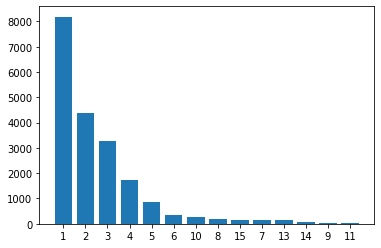

In [42]:
plt.bar(range(len(no_reactions2counts)), list(no_reactions2counts.values()), align='center')
plt.xticks(range(len(no_reactions2counts)), list(no_reactions2counts.keys()))
#plt.xticks(rotation=90)
plt.show()

In [0]:
reactions_together2counts_tmp = [[reaction['reactionmeddrapt'] for reaction in entry] for entry in df['patient.reaction']]
#reactions_together2counts_srt = []
#reactions_together2counts_srt.append([x.sort() for x in reactions_together2counts])

In [41]:
reactions_together2counts_tmp.sort()
reactions_together2counts_tmp[0:10]

[['ARTHRALGIA', 'OEDEMA PERIPHERAL', 'PURPURA'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea'],
 ['Abdominal distension', 'Headache', 'Tinnitus', 'Diarrhoea']]

In [0]:
reactions_together2counts = {}
for reaction_case in reactions_together2counts_tmp:
    joined_reactions = ','.join(reaction_case)
    if joined_reactions not in reactions_together2counts.keys():
        reactions_together2counts[joined_reactions] = 1
    else:
        reactions_together2counts[joined_reactions]+=1
reactions_together2counts = {key: value for key, value in sorted(reactions_together2counts.items(), key=lambda item: item[1], reverse=True)}

In [44]:
reactions_together_pairs2count = {key: value for key, value in sorted(reactions_together2counts.items(), key=lambda item: item[1], reverse=True) if ',' in key}
reactions_together_pairs2count_max_20 = take(20, reactions_together_pairs2count)
print(list(reactions_together_pairs2count_max_20.keys()))

['Meconium stain,Amniotic cavity infection,Maternal exposure during pregnancy', 'Oedema peripheral,Fluid retention', 'Unevaluable event,Malaise', 'Abdominal distension,Headache,Tinnitus,Diarrhoea', 'Anaemia,Fatigue,Fibrosis,Dyspnoea,Weight decreased', 'Arthralgia,Dyspnoea,Cough', 'Arthralgia,Headache,Pain in jaw', 'Asthenia,Anaemia,Tooth disorder', 'Blood pressure fluctuation,Dyspepsia,Allergic cough,Headache,Malaise', 'Breast cancer,Device misuse', 'Cardiac failure congestive,Fluid retention,Swelling', 'Chest pain,Back pain', 'Cognitive disorder,Alopecia', 'Cough,Chest discomfort', 'Diarrhoea,Vomiting,Abdominal discomfort,Malaise,Dyspepsia', 'Disorientation,Drug prescribing error,Incorrect dose administered,Medication error', 'Dizziness,Loss of consciousness,Fall', 'Drug ineffective,Condition aggravated,Dyspnoea', 'Drug ineffective,Pulmonary arterial hypertension', 'Drug ineffective,Swelling,Joint swelling']


In [0]:
drugs_together2counts_tmp = [list(set([drug['medicinalproduct'] for drug in entry])) for entry in df['patient.drug']]

In [46]:
drugs_together2counts_tmp.sort()
drugs_together2counts_tmp[0:10]

[['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML'],
 ['ABATACEPT SUBQ INJECTION 125MG/ML']]

In [0]:
drugs_together2counts = {}
for drug_case in drugs_together2counts_tmp:
    joined_drugs = ','.join(drug_case)
    if joined_drugs not in drugs_together2counts.keys():
        drugs_together2counts[joined_drugs] = 1
    else:
        drugs_together2counts[joined_drugs]+=1
drugs_together2counts = {key: value for key, value in sorted(drugs_together2counts.items(), key=lambda item: item[1], reverse=True)}

In [48]:
drugs_together_pairs2count = {key: value for key, value in sorted(drugs_together2counts.items(), key=lambda item: item[1], reverse=True) if ',' in key}
drugs_together_pairs2count_max_20 = take(20, drugs_together_pairs2count)
print(list(drugs_together_pairs2count_max_20.keys()))

['LETAIRIS,TYVASO', 'LETAIRIS,REVATIO', 'LETAIRIS,ADCIRCA', 'LETAIRIS,REMODULIN', 'METRONIDAZOLE,CEFTRIAXONE', 'LETAIRIS,TYVASO,REVATIO', 'METRONIDAZOLE,CEFTRIAXONE,AMOXICILLIN', 'LETAIRIS,ADCIRCA,REMODULIN', 'LETAIRIS,OXYGEN.', 'ALLOPURINOL.,CARVEDILOL.,CITALOPRAM HYDROBROMIDE.,COUMADIN,LANTUS,MUCINEX,CENTRUM SILVER                     /02363801/,LETAIRIS,LISINOPRIL.,FISH OIL,KLOR-CON,FUROSEMIDE.,ASPIRIN.', 'CAPTOPRIL SANDOZ,SINVASTACOR', 'CEFUROXIME,MEROPENEM,VIBRAMYCIN,AUGMENTIN XR,ZITHROMAX,BIAXIN,TIMENTIN,PRIMAQUINE,CECLOR,AZTREONAM,GENTAMICIN SULFATE', 'CLARITHROMYCIN,CEFTRIAXONE,CEFMETAZOLE,AMOXICILLIN+CLAVULANATE', 'DONEPEZIL (UNKNOWN),DONEPEZIL,TRAMADOL', 'FENTANILO//FENTANYL,DEXKETOPROFEN,5-FLUOROURACIL,FOLINIC ACID,OXALIPLATIN', 'LASIX,LETAIRIS', 'LETAIRIS,EPOPROSTENOL.,REVATIO', 'LETAIRIS,OXYGEN.,TYVASO', 'LETAIRIS,VENTAVIS,REVATIO', 'NEO-MERCAZOLE,TIAPRIDAL,PREVISCAN,TRIMETAZIDINE HYDROCHLORIDE SANDOZ,AVLOCARDYL,BISOPROLOL,KASKADIL,ATARAX /CAN/,LOVENOX,FLODIL LP,DOLIPRANE,